In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# %tensorflow_version 2.x
# %tensorflow_version 1.x
# import tensorflow as tf
# print(tf.__version__)

In [3]:
import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

import pandas as pd
import numpy as np
from matplotlib import pyplot
import scipy.misc 
from math import sqrt 
import itertools
from IPython.display import display
%matplotlib inline
import random

# %tensorflow_version 2.x
import tensorflow as tf

seed = 1203
np.random.seed(seed)
random.seed(seed)
# tf.random.set_random_seed(seed)
# tf.random.set_seed(seed)

from keras.utils import plot_model
import keras.backend as K
from keras.models import Model, Sequential
import keras.layers as layers
from keras.optimizers import Adam, SGD
from keras.regularizers import l1, l2
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator 
from sklearn.model_selection import train_test_split

# Data Class Weight
from sklearn.utils import class_weight
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard



def FER_Model(input_shape):
    # first input model
    visible = layers.Input(shape=input_shape, name='input')
    
    #             LSTM Version            #
    # net = layers.LSTM(10, return_sequences=False)(visible)
    net = layers.Dense(64, activation='relu')(visible)
    # net = layers.Dropout(0.2)(net)


    # net = layers.LSTM(5, return_sequences=True)(net)
    net = layers.Dense(32, activation='relu')(net)
    net = layers.Dropout(0.2)(net)

    # net = layers.LSTM(5, return_sequences=True)(visible)
    # net = layers.Dense(16, activation='relu')(net)
    # # net = layers.Dropout(0.2)(net)

    # net = layers.LSTM(1, return_sequences=False)(visible)
    # net = layers.Dense(8, activation='relu')(net)
    # net = layers.Dropout(0.5)(net)

    # net = layers.Conv2D(64, kernel_size=3, padding='same')(visible)
    # net = layers.Activation('relu')(net)
    # net = layers.LeakyReLU()(net)
    # net = layers.MaxPool2D(pool_size=2)(net)

    # shortcut_1 = net

    # net = layers.Conv2D(32, kernel_size=3, padding='same')(net)
    # net = layers.Activation('relu')(net)
    # net = layers.LeakyReLU()(net)
    # net = layers.MaxPool2D(pool_size=2)(net)

    # shortcut_2 = net

#     net = layers.Conv2D(256, kernel_size=3, padding='same')(net)
#     # net = layers.Activation('relu')(net)
#     net = layers.LeakyReLU()(net)
#     net = layers.MaxPool2D(pool_size=2)(net)

#     shortcut_3 = net

#     net = layers.Conv2D(128, kernel_size=1, padding='same')(net)
#     # net = layers.Activation('relu')(net)
#     net = layers.LeakyReLU()(net)
#     net = layers.MaxPool2D(pool_size=2)(net)

    net = layers.Flatten()(net)
    net = layers.Dense(64)(net)
    net = layers.LeakyReLU()(net)
    net = layers.Dense(num_classes, activation='softmax')(net)

    # create model 
    model = Model(inputs =visible, outputs = net)
    # summary layers
    print(model.summary())
    
    return model

# input_data_length = int(input('input_data_length : '))
input_data_length = 30
num_classes = 2

gdrive_path = '/content/gdrive/My Drive/Colab Notebooks/Project_Stock/'

# model_range = []
model_range = range(301, 342)
# break

for model_num in model_range:

  try:
    Made_X_ = np.load(gdrive_path + 'Made_X/Made_X %s_%s.npy' % (input_data_length, model_num))
    Made_Y = np.load(gdrive_path + 'Made_X/Made_Y %s_%s.npy' % (input_data_length, model_num)).reshape(-1, 1)


    #       dataset 분리      #
    # dataX 구성 : VOLUME, MA, CMO, OBV, RSI, MACD, MACD_SIGNAL, MACD_OSC 
    # dataX 구성 : VOLUME, EMA1, EMA2, CMO, OBV, RSI, MACD, MACD_SIGNAL, MACD_OSC 
    # Made_X = Made_X_[:, :, [-4]]
    Made_X = Made_X_[:, :, :4]
    print(Made_X.shape)
    print(Made_Y.shape)
    # break

    row = Made_X.shape[1]
    col = Made_X.shape[2]

    X_train, X_val, Y_train, Y_val = train_test_split(Made_X, Made_Y, test_size=0.3,
                                                      shuffle=False)

    X_train = X_train.astype('float32')#.reshape(-1, input_data_length, col, 1)
    X_val = X_val.astype('float32')#.reshape(-1, input_data_length, col, 1)
    print(X_train.shape)
    print(X_val.shape)

    # print(Y_train[:, 0])
    class_weights = class_weight.compute_class_weight('balanced', 
                                                      np.unique(Y_train[:, 0]),
                                                      Y_train[:, 0])
    class_weights = dict(enumerate(class_weights))
    print(class_weights)
    # quit()

    Y_train = Y_train.astype('float32')
    Y_val = Y_val.astype('float32')
    # print(Y_val[:5])
    Y_train = np_utils.to_categorical(Y_train, num_classes)
    Y_val = np_utils.to_categorical(Y_val, num_classes)
    # print(Y_val[:5])
    # break
    print(Y_train.shape)
    print(Y_val.shape)

    # datagen = ImageDataGenerator( 
    # #     rotation_range = 60,
    # #     zoom_range = 0.6,
    # #     shear_range = 0.6,
    # #     horizontal_flip = True,
    # #     width_shift_range=0.6,
    # #     height_shift_range=0.6,
    #     fill_mode = 'nearest'
    #     )

    # testgen = ImageDataGenerator( 
    #     )
    # datagen.fit(X_train)
    batch_size = 39

    # for X_batch, _ in datagen.flow(X_train, Y_train, batch_size=9):
    #     for i in range(0, 9): 
    #         pyplot.axis('off') 
    #         pyplot.subplot(330 + 1 + i) 
    #         pyplot.imshow(X_batch[i].reshape(input_data_length, col))
    #     pyplot.axis('off') 
    #     pyplot.show() 
    #     break
        
    # train_flow = datagen.flow(X_train, Y_train, batch_size=batch_size) 
    # val_flow = testgen.flow(X_val, Y_val, batch_size=batch_size) 

    model = FER_Model((row, col))
    # from keras.models import load_model
    # model = load_model(gdrive_path + 'model/rapid_ascending %s_%s_rnn_macdonly.hdf5' % (input_data_length, model_num))
    opt = Adam(lr=0.0001, decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
      
        
    filepath = gdrive_path + "model/rapid_ascending %s_%s_futures_rnn.hdf5" % (input_data_length, model_num)
    checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
    checkpoint2 = TensorBoard(log_dir='Tensorboard_graph',
                              histogram_freq=0,
                              write_graph=True,
                              write_images=True)
    checkpoint3 = EarlyStopping(monitor='val_accuracy', patience=200)
    callbacks_list = [checkpoint, checkpoint2, checkpoint3]

    # keras.callbacks.Callback 로 부터 log 를 받아와 history log 를 작성할 수 있다.

    # we iterate 200 times over the entire training set
    num_epochs = 1000
    history = model.fit(X_train, Y_train,
                        steps_per_epoch=int(len(X_train) / batch_size), 
                        epochs=num_epochs,  
                        verbose=2,  
                        callbacks=callbacks_list,
                        class_weight=class_weights,
                        validation_data=(X_val, Y_val),  
                        validation_steps=int(len(X_val) / batch_size),
                        shuffle=False)
    
  except Exception as e:
    print('Error occured :', e)


(2012, 30, 4)
(2012, 1)
(1408, 30, 4)
(604, 30, 4)
{0: 0.557403008709422, 1: 4.855172413793103}
(1408, 2)
(604, 2)
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 30, 4)]           0         
_________________________________________________________________
dense (Dense)                (None, 30, 64)            320       
_________________________________________________________________
dense_1 (Dense)              (None, 30, 32)            2080      
_________________________________________________________________
dropout (Dropout)            (None, 30, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 960)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                61504     
_____

KeyboardInterrupt: ignored

### Check True True Realtime

26/26 [==============================] - 0s 1ms/step


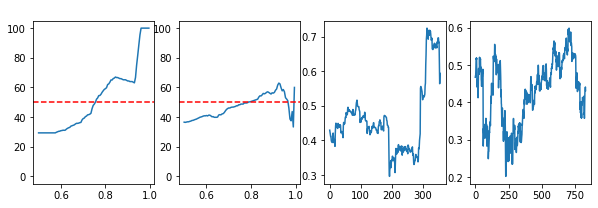

In [14]:
#     Confidence value should be adjusted by min max scale in y_pred    #
from keras.models import load_model
import matplotlib.pyplot as plt


for model_num in model_range:

  try:

    Made_X_ = np.load(gdrive_path + 'Made_X/Made_X %s_%s.npy' % (input_data_length, model_num))
    Made_Y = np.load(gdrive_path + 'Made_X/Made_Y %s_%s.npy' % (input_data_length, model_num)).reshape(-1, 1)


    #       dataset 분리      #
    # dataX 구성 : VOLUME, MA, CMO, OBV, RSI, MACD, MACD_SIGNAL, MACD_OSC 
    # dataX 구성 : VOLUME, EMA1, EMA2, CMO, OBV, RSI, MACD, MACD_SIGNAL, MACD_OSC 
    # Made_X = Made_X_[:, :, [-4]]
    Made_X = Made_X_[:, :, :4]
    # print(Made_X.shape)
    # print(Made_Y.shape)
    # break

    row = Made_X.shape[1]
    col = Made_X.shape[2]

    X_train, X_val, Y_train, Y_val = train_test_split(Made_X, Made_Y, test_size=0.3,
                                                      shuffle=False)

    X_train = X_train.astype('float32')#.reshape(-1, input_data_length, col, 1)
    X_val = X_val.astype('float32')#.reshape(-1, input_data_length, col, 1)

    model_path = gdrive_path + "model/rapid_ascending %s_%s_futures_rnn.hdf5" % (input_data_length, model_num)
    model = load_model(model_path)
    val_y_pred_ = model.predict(X_val, verbose=1)
    train_y_pred_ = model.predict(X_train, verbose=1)
    # total_y_pred_ = model.predict(Made_X, verbose=1)
    
    plt.figure(figsize=(10, 3))

    for index, y_pred_ in enumerate([val_y_pred_, train_y_pred_]):

      # print('len(y_pred_) :', len(y_pred_))
      target_column = y_pred_[:, [-1]]
      # column_min, column_max = train_y_pred_.min(),train_y_pred_.max()
      column_min, column_max = target_column.min(),target_column.max()
      # print(column_min, column_max)

      x_ticks = np.arange(0.5, 1, 0.005)
      # x_ticks = np.arange(0.5, column_max, 0.005) <-- column_max 대응할만한 값을 찾아야한다. 1 까지는 사용못할것
      confidence_result = list()
      for confidence in x_ticks:
        # confidence = 0.9

        # if column_max < 0.5:
        #   break
        # else:
        #   scaled_confidence = .5 + (column_max - .5) * confidence
        scaled_confidence = column_min + (column_max - column_min) * confidence

        # scaled_confidence = confidence
        # print(scaled_confidence)
        # print('confidence :', confidence)

        y_pred = np.where(target_column >= scaled_confidence, 1, 0).reshape(-1, )

        #   inverse version   #
        # confidence = 1 - confidence
        # scaled_confidence = y_pred_[:, [-1]].min() + (y_pred_[:, [-1]].max() - y_pred_[:, [-1]].min()) * confidence
        # y_pred = np.where(y_pred_[:, [-1]] <= scaled_confidence, 1, 0).reshape(-1, )

        #     결국, Categorical 은 index 값으로 value 를 나타내는 것    #
        # t_te = np.argmax(Y_val, axis=1)

        if index == 0:
          t_te = Y_val
        else:
          t_te = Y_train

        # print(y_pred_[:5])
        # print(Y_val[:5])
        # break

        pred_true = 0
        real_true = 0

        #       predict value 존나 높으면 True 일 확률 존나 높은건데, 그게 진짜 True가 맞냐 이걸 알고 싶은거지     #
        #       confidence를 만족하는 label이 1인 데이터 안에서 pred 1 / label 1 -> 이걸 도출해면 된다        #

        for i in range(len(y_pred)):
          if y_pred[i] == 1:  
            pred_true += 1
            if t_te[i] == y_pred[i]:
              real_true += 1

        true_true = real_true / pred_true * 100
        confidence_result.append(true_true)
        # print('True Pred / Total True : %s / %s' % (real_true, pred_true))
        # print('Accuracy : %2.f %%' % (true_true))
        # print()

      # if column_max < 0.5:
      #   continue
      
      plt.subplot(1, 4, index + 1)
      plt.plot(x_ticks, confidence_result)
      plt.axhline(50, linestyle='--', color='red')
      plt.ylim(-5, 105)
      plt.title('%s %s' % ((column_min, column_max)), color='white', fontsize=10)

      if index == 0:
        plt.subplot(1, 4, index + 3)
        plt.plot(Made_X_[-len(X_val):, [-1], [3]])
      elif index == 1:
        plt.subplot(1, 4, index + 3)
        plt.plot(Made_X_[:len(X_train), [-1], [3]])
        plt.show()
      
  except Exception as e:
    print('Error occured : ', e)

  break

### Check True True Possibility

10/10 [==============================] - 0s 1ms/step
True Pred / Total True : 2 / 2
Accuracy : 100 %


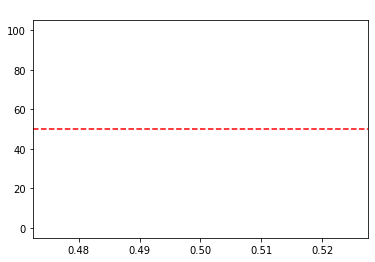

11/11 [==============================] - 0s 1ms/step
True Pred / Total True : 27 / 91
Accuracy : 30 %
True Pred / Total True : 10 / 44
Accuracy : 23 %
True Pred / Total True : 0 / 15
Accuracy :  0 %
True Pred / Total True : 0 / 10
Accuracy :  0 %
True Pred / Total True : 0 / 1
Accuracy :  0 %
True Pred / Total True : 0 / 1
Accuracy :  0 %


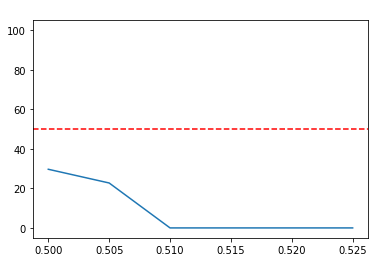

10/10 [==============================] - 0s 1ms/step
True Pred / Total True : 17 / 19
Accuracy : 89 %


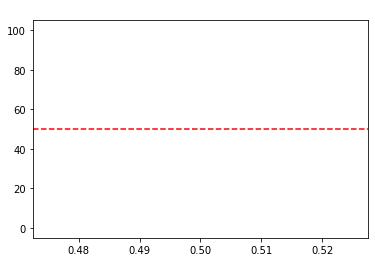

11/11 [==============================] - 0s 1ms/step
True Pred / Total True : 10 / 12
Accuracy : 83 %


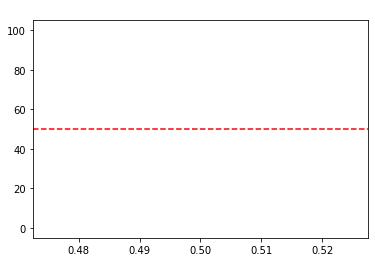

11/11 [==============================] - 0s 1ms/step
True Pred / Total True : 0 / 8
Accuracy :  0 %
True Pred / Total True : 0 / 4
Accuracy :  0 %
True Pred / Total True : 0 / 2
Accuracy :  0 %
True Pred / Total True : 0 / 2
Accuracy :  0 %
True Pred / Total True : 0 / 2
Accuracy :  0 %


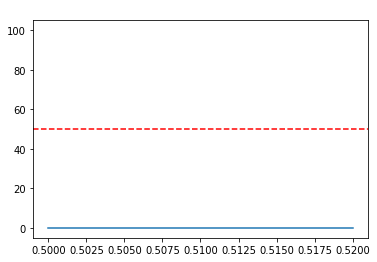

11/11 [==============================] - 0s 1ms/step
True Pred / Total True : 1 / 51
Accuracy :  2 %
True Pred / Total True : 1 / 51
Accuracy :  2 %
True Pred / Total True : 1 / 51
Accuracy :  2 %
True Pred / Total True : 1 / 49
Accuracy :  2 %
True Pred / Total True : 1 / 49
Accuracy :  2 %
True Pred / Total True : 1 / 47
Accuracy :  2 %
True Pred / Total True : 1 / 46
Accuracy :  2 %
True Pred / Total True : 1 / 46
Accuracy :  2 %
True Pred / Total True : 1 / 45
Accuracy :  2 %
True Pred / Total True : 1 / 45
Accuracy :  2 %
True Pred / Total True : 1 / 43
Accuracy :  2 %
True Pred / Total True : 1 / 37
Accuracy :  3 %
True Pred / Total True : 1 / 32
Accuracy :  3 %
True Pred / Total True : 1 / 30
Accuracy :  3 %
True Pred / Total True : 1 / 28
Accuracy :  4 %
True Pred / Total True : 1 / 22
Accuracy :  5 %
True Pred / Total True : 1 / 19
Accuracy :  5 %
True Pred / Total True : 0 / 13
Accuracy :  0 %
True Pred / Total True : 0 / 11
Accuracy :  0 %
True Pred / Total True : 0 / 11
Acc

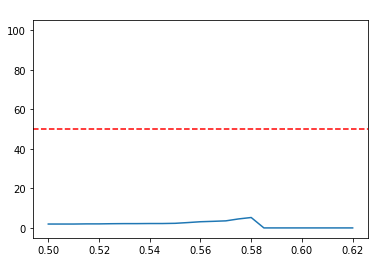

11/11 [==============================] - 0s 1ms/step
True Pred / Total True : 0 / 26
Accuracy :  0 %
True Pred / Total True : 0 / 22
Accuracy :  0 %
True Pred / Total True : 0 / 19
Accuracy :  0 %
True Pred / Total True : 0 / 14
Accuracy :  0 %
True Pred / Total True : 0 / 2
Accuracy :  0 %


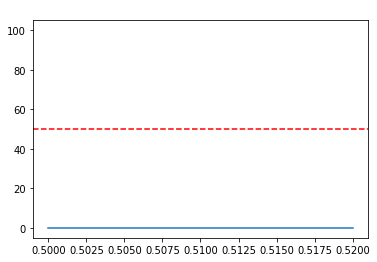

11/11 [==============================] - 0s 1ms/step
True Pred / Total True : 1 / 45
Accuracy :  2 %
True Pred / Total True : 1 / 43
Accuracy :  2 %
True Pred / Total True : 1 / 40
Accuracy :  2 %
True Pred / Total True : 1 / 37
Accuracy :  3 %
True Pred / Total True : 1 / 32
Accuracy :  3 %
True Pred / Total True : 1 / 26
Accuracy :  4 %
True Pred / Total True : 1 / 22
Accuracy :  5 %
True Pred / Total True : 0 / 9
Accuracy :  0 %


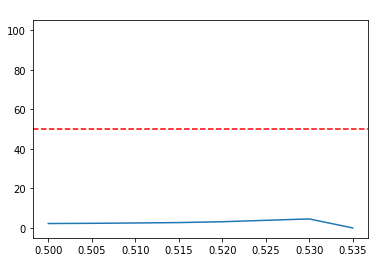

11/11 [==============================] - 0s 1ms/step
True Pred / Total True : 25 / 38
Accuracy : 66 %
True Pred / Total True : 24 / 37
Accuracy : 65 %
True Pred / Total True : 24 / 37
Accuracy : 65 %
True Pred / Total True : 24 / 36
Accuracy : 67 %
True Pred / Total True : 22 / 34
Accuracy : 65 %
True Pred / Total True : 21 / 33
Accuracy : 64 %
True Pred / Total True : 20 / 32
Accuracy : 62 %
True Pred / Total True : 19 / 31
Accuracy : 61 %
True Pred / Total True : 19 / 31
Accuracy : 61 %
True Pred / Total True : 17 / 28
Accuracy : 61 %
True Pred / Total True : 16 / 27
Accuracy : 59 %
True Pred / Total True : 15 / 25
Accuracy : 60 %
True Pred / Total True : 14 / 24
Accuracy : 58 %
True Pred / Total True : 14 / 23
Accuracy : 61 %
True Pred / Total True : 9 / 16
Accuracy : 56 %
True Pred / Total True : 9 / 13
Accuracy : 69 %
True Pred / Total True : 8 / 9
Accuracy : 89 %
True Pred / Total True : 8 / 8
Accuracy : 100 %
True Pred / Total True : 8 / 8
Accuracy : 100 %
True Pred / Total True

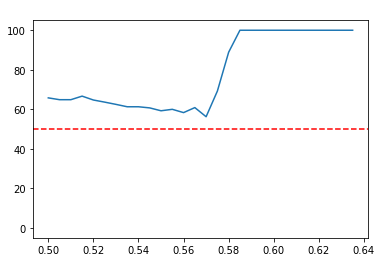

11/11 [==============================] - 0s 1ms/step
True Pred / Total True : 18 / 129
Accuracy : 14 %
True Pred / Total True : 18 / 129
Accuracy : 14 %
True Pred / Total True : 18 / 128
Accuracy : 14 %
True Pred / Total True : 18 / 127
Accuracy : 14 %
True Pred / Total True : 18 / 126
Accuracy : 14 %
True Pred / Total True : 18 / 125
Accuracy : 14 %
True Pred / Total True : 18 / 125
Accuracy : 14 %
True Pred / Total True : 18 / 125
Accuracy : 14 %
True Pred / Total True : 18 / 124
Accuracy : 15 %
True Pred / Total True : 18 / 123
Accuracy : 15 %
True Pred / Total True : 18 / 123
Accuracy : 15 %
True Pred / Total True : 18 / 123
Accuracy : 15 %
True Pred / Total True : 18 / 122
Accuracy : 15 %
True Pred / Total True : 18 / 122
Accuracy : 15 %
True Pred / Total True : 18 / 120
Accuracy : 15 %
True Pred / Total True : 18 / 117
Accuracy : 15 %
True Pred / Total True : 18 / 116
Accuracy : 16 %
True Pred / Total True : 18 / 116
Accuracy : 16 %
True Pred / Total True : 18 / 115
Accuracy : 16

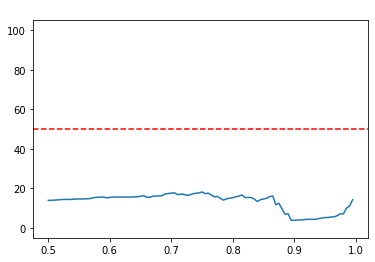

11/11 [==============================] - 0s 1ms/step
True Pred / Total True : 34 / 38
Accuracy : 89 %
True Pred / Total True : 1 / 1
Accuracy : 100 %


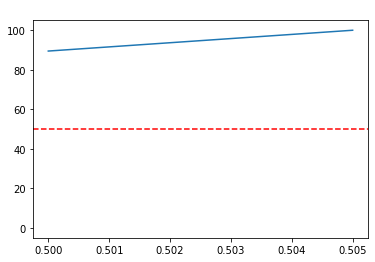

11/11 [==============================] - 0s 1ms/step
True Pred / Total True : 2 / 2
Accuracy : 100 %


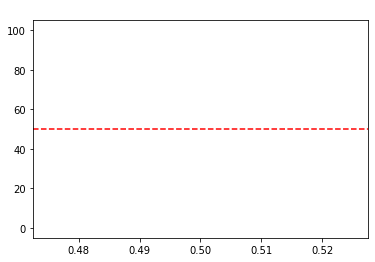

12/12 [==============================] - 0s 1ms/step
True Pred / Total True : 3 / 5
Accuracy : 60 %


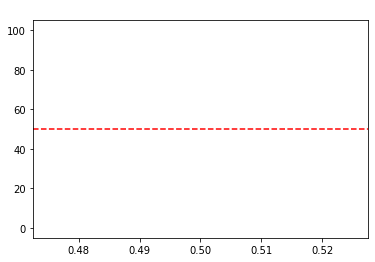

11/11 [==============================] - 0s 1ms/step
True Pred / Total True : 5 / 35
Accuracy : 14 %
True Pred / Total True : 0 / 1
Accuracy :  0 %


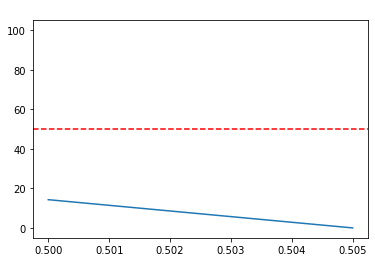

11/11 [==============================] - 0s 1ms/step
Error occured :  [Errno 2] No such file or directory: '/content/gdrive/My Drive/Colab Notebooks/Project_Stock/Made_X/Made_X 30_212.npy'
Error occured :  [Errno 2] No such file or directory: '/content/gdrive/My Drive/Colab Notebooks/Project_Stock/Made_X/Made_X 30_213.npy'
Error occured :  [Errno 2] No such file or directory: '/content/gdrive/My Drive/Colab Notebooks/Project_Stock/Made_X/Made_X 30_214.npy'
Error occured :  [Errno 2] No such file or directory: '/content/gdrive/My Drive/Colab Notebooks/Project_Stock/Made_X/Made_X 30_215.npy'


In [ ]:
#     Confidence value should be adjusted by min max scale in y_pred    #
from keras.models import load_model
import matplotlib.pyplot as plt

for model_num in model_range:

  try:

    Made_X_ = np.load(gdrive_path + 'Made_X/Made_X %s_%s.npy' % (input_data_length, model_num))
    Made_Y = np.load(gdrive_path + 'Made_X/Made_Y %s_%s.npy' % (input_data_length, model_num)).reshape(-1, 1)


    #       dataset 분리      #
    # dataX 구성 : VOLUME, MA, CMO, OBV, RSI, MACD, MACD_SIGNAL, MACD_OSC 
    # dataX 구성 : VOLUME, EMA1, EMA2, CMO, OBV, RSI, MACD, MACD_SIGNAL, MACD_OSC 
    # Made_X = Made_X_[:, :, [-4]]
    Made_X = Made_X_[:, :, :4]
    # print(Made_X.shape)
    # print(Made_Y.shape)
    # break

    row = Made_X.shape[1]
    col = Made_X.shape[2]

    X_train, X_val, Y_train, Y_val = train_test_split(Made_X, Made_Y, test_size=0.3,
                                                      shuffle=False)

    X_train = X_train.astype('float32')#.reshape(-1, input_data_length, col, 1)
    X_val = X_val.astype('float32')#.reshape(-1, input_data_length, col, 1)

    model_path = gdrive_path + "model/rapid_ascending %s_%s_futures_rnn.hdf5" % (input_data_length, model_num)
    model = load_model(model_path)
    y_pred_ = model.predict(X_val, verbose=1)

    target_column = y_pred_[:, [-1]]
    column_min, column_max = target_column.min(),target_column.max()
    # print(column_min, column_max)

    x_ticks = np.arange(0.8, 1, 0.005)
    # x_ticks = np.arange(0.5, column_max, 0.005)
    confidence_result = list()
    for confidence in x_ticks:
      # confidence = 0.9

      if column_max < 0.5:
        break
      scaled_confidence = .5 + (column_max - .5) * confidence
      # scaled_confidence = confidence
      # print(scaled_confidence)
      # print('confidence :', confidence)

      y_pred = np.where(target_column >= scaled_confidence, 1, 0).reshape(-1, )

      #   inverse version   #
      # confidence = 1 - confidence
      # scaled_confidence = y_pred_[:, [-1]].min() + (y_pred_[:, [-1]].max() - y_pred_[:, [-1]].min()) * confidence
      # y_pred = np.where(y_pred_[:, [-1]] <= scaled_confidence, 1, 0).reshape(-1, )

      #     결국, Categorical 은 index 값으로 value 를 나타내는 것    #
      # t_te = np.argmax(Y_val, axis=1)
      t_te = Y_val

      # print(y_pred_[:5])
      # print(Y_val[:5])
      # break

      pred_true = 0
      real_true = 0

      #       predict value 존나 높으면 True 일 확률 존나 높은건데, 그게 진짜 True가 맞냐 이걸 알고 싶은거지     #
      #       confidence를 만족하는 label이 1인 데이터 안에서 pred 1 / label 1 -> 이걸 도출해면 된다        #

      for i in range(len(y_pred)):
        if y_pred[i] == 1:  
          pred_true += 1
          if t_te[i] == y_pred[i]:
            real_true += 1

      true_true = real_true / pred_true * 100
      confidence_result.append(true_true)
      print('True Pred / Total True : %s / %s' % (real_true, pred_true))
      print('Accuracy : %2.f %%' % (true_true))
      # print()

    if column_max < 0.5:
      continue
    plt.plot(x_ticks, confidence_result)
    plt.axhline(50, linestyle='--', color='red')
    plt.ylim(-5, 105)
    plt.title('%.2f %.2f' % ((column_min, column_max)), color='white', fontsize=10)
    plt.show()

  except Exception as e:
    print('Error occured : ', e)


### Check Entry points in Chart

confidence : 0.8


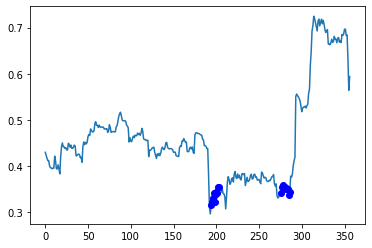

In [ ]:
#     Confidence value should be adjusted by min max scale in y_pred    #
from keras.models import load_model


confidence = 0.8
scaled_confidence = column_min + (column_max - column_min) * confidence
# print(scaled_confidence)
print('confidence :', confidence)

y_pred = np.where(target_column >= scaled_confidence, 1, 0).reshape(-1, )
t_te = np.argmax(Y_val, axis=1)

close = Made_X_[-len(X_val):, [-1], [3]]
plt.plot(close)
# plt.show()

long_marker_x = list()
long_marker_y = list()
for i in range(len(y_pred)):
  if y_pred[i] == 1:  
    if t_te[i] == y_pred[i]:
      long_marker_x.append(i)
      long_marker_y.append(close[i])
      

plt.plot(long_marker_x, long_marker_y, 'o', color='blue')
plt.show()